In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [258]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yakupzengin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [259]:
data= pd.read_csv("data/movie_review_data.csv")

In [260]:
data

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


In [261]:
data["sentiment"].value_counts()

sentiment
neg    500
pos    500
Name: count, dtype: int64

In [262]:
data.dropna(inplace=True)

In [263]:
data

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


In [264]:
print("no duplicates found")

no duplicates found


In [265]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
import regex as re

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yakupzengin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [266]:
def clean_text(review):
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    review = review.lower()
    review = re.sub(r'[^\w\s]', '', review)  # Noktalama kaldırma
    review = " ".join(lemmatizer.lemmatize(word) for word in review.split() if word not in stop_words)
    return review

In [267]:
data["text"] = data["text"].apply(clean_text)  

In [268]:
from wordcloud import WordCloud

In [269]:
negative_review = " ".join(review for review in data["text"][data["sentiment"] == "neg"].astype(str))

In [270]:
def draw_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

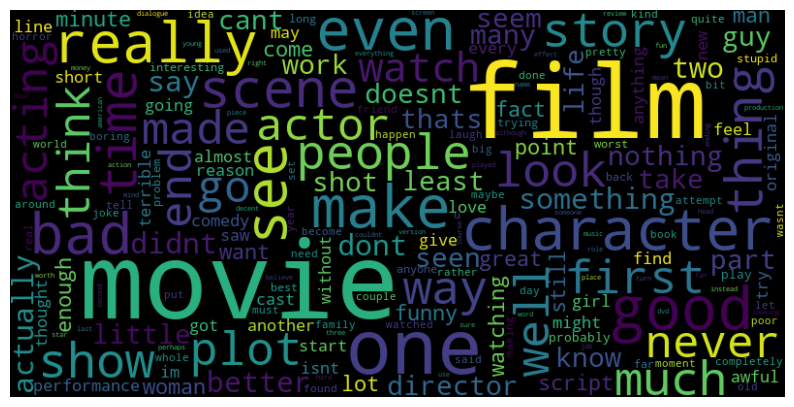

In [271]:
draw_wordcloud(negative_review)

In [272]:
positive_review = " ".join(review for review in data["text"][data["sentiment"] == "pos"].astype(str))


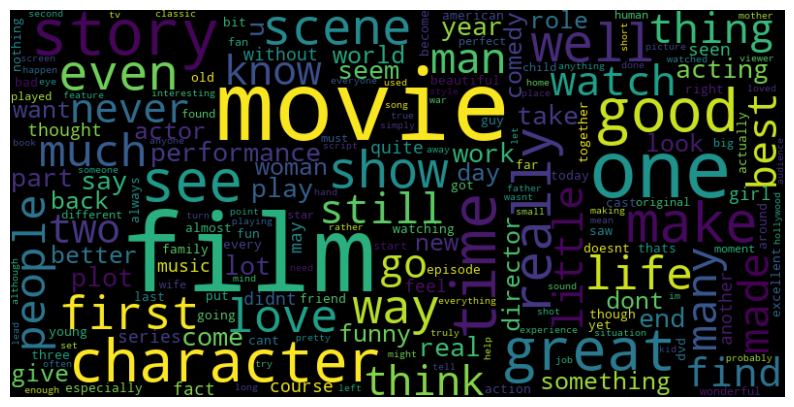

In [273]:
draw_wordcloud(positive_review)

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 5000)

In [275]:
reviews = cv.fit_transform(data["text"]).toarray()

In [276]:
data["sentiment"] = data["sentiment"].replace(["pos", "neg"],[1, 0])    

C:\Users\yakupzengin\AppData\Local\Temp\ipykernel_12296\2323201152.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["sentiment"] = data["sentiment"].replace(["pos", "neg"],[1, 0])


In [277]:
data["sentiment"].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [279]:
model = LogisticRegression()

In [280]:
x_train,x_test , y_train, y_test = train_test_split(reviews,data["sentiment"],test_size=0.2)

In [281]:
model.fit(x_train,y_train)

LogisticRegression()

In [282]:
log_predictions = model.predict(x_test)

In [283]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [284]:
accuracy = accuracy_score(y_test,log_predictions)
accuracy

0.835

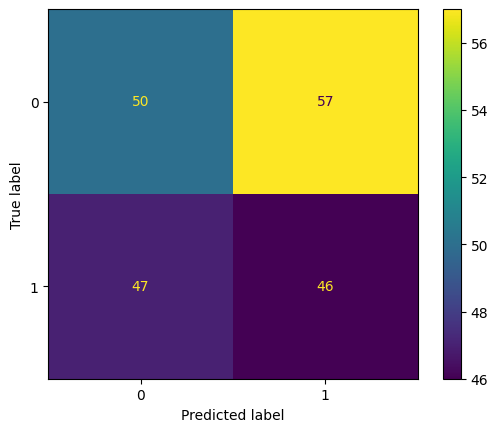

In [285]:
confusion_matrix= confusion_matrix(y_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model.classes_)
display.plot()
plt.show()

#### 1. Random Forest Model

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [287]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [288]:
rf_predictions = rf_model.predict(x_test)

In [289]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8


SVM Accuracy: 0.855


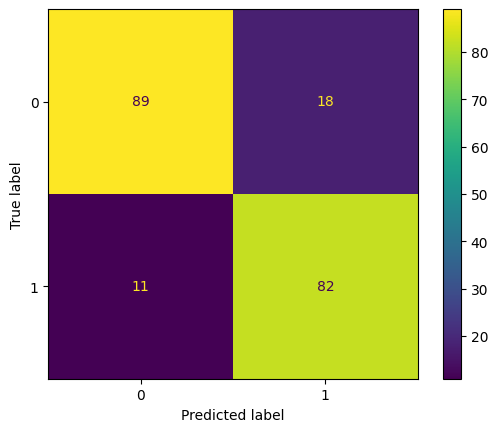

In [290]:
from sklearn.svm import SVC

# SVM modeli
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

# Test seti üzerinde tahmin
svm_predictions = svm_model.predict(x_test)

# Sonuçları değerlendirme
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

svm_conf_matrix = confusion_matrix(y_test, svm_predictions, labels=svm_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix, display_labels=svm_model.classes_)
display.plot()
plt.show()


In [291]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test, log_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       107
           1       0.79      0.87      0.83        93

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       107
           1       0.76      0.83      0.79        93

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       107
           1       0.82      0.88      0.85        93

    accuracy                           0.85       200
   macro avg       0.85    

In [294]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize model and grid search
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy', cv=5, verbose=1)
grid_search_rf.fit(x_train, y_train)

# Best parameters and score
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Score:", grid_search_rf.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Random Forest Score: 0.79125


In [296]:
from sklearn.svm import SVC

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only used for 'poly' kernel
}

# Initialize model and grid search
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, scoring='accuracy', cv=5, verbose=1)
grid_search_svm.fit(x_train, y_train)

# Best parameters and score
print("Best SVM Parameters:", grid_search_svm.best_params_)
print("Best SVM Score:", grid_search_svm.best_score_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best SVM Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Score: 0.8012500000000001


In [297]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter distribution
param_dist_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized search
rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)
random_search_rf.fit(x_train, y_train)

# Best parameters and score
print("Best Random Forest Parameters:", random_search_rf.best_params_)
print("Best Random Forest Score:", random_search_rf.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best Random Forest Score: 0.7887500000000001


In [298]:
# Retrain the model with the best parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(x_train, y_train)

# Evaluate on test data
from sklearn.metrics import classification_report
rf_predictions = best_rf.predict(x_test)
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       107
           1       0.80      0.87      0.84        93

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [299]:
import pickle as pk

In [300]:
pk.dump(svm_model,open("model.pkl","wb"))

In [302]:
pk.dump(cv,open("scaler.pkl","wb"))